In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow
print(tensorflow.__version__)

1.15.2


#Importing Necessary Libraries

In [3]:
from keras.layers import Embedding
from keras.models import Sequential
import keras as K
import numpy as np
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
import re
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM

Using TensorFlow backend.


#Importing Datasets from which spaces have been removed

In [5]:
from google.colab import files
uploaded = files.upload()

Saving train_final.csv to train_final.csv


In [0]:
import io
df1 = pd.read_csv(io.StringIO(uploaded['train_final.csv'].decode('utf-8')))

In [7]:
from google.colab import files
uploaded = files.upload()

Saving test_final.csv to test_final.csv


In [0]:
import io
df2 = pd.read_csv(io.StringIO(uploaded['test_final.csv'].decode('utf-8')))

#Function to remove numbers, alphabets, special characters and emoticons

In [0]:
def remove_punct(text):
    stp='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    text  = "".join([char for char in text if char not in stp])
    text = re.sub('[0-9]+', '', text)
    text = re.sub('[A-Z]+', '', text)
    text = re.sub('[a-z]+', '', text)
    return text

In [0]:
def remove_emoji(text):
    text = re.sub('[u"\U0001F600-\U0001F64F"]+', '', text)
    text = re.sub('[u"\U0001F300-\U0001F5FF"]+', '', text)
    text = re.sub('[u"\U0001F680-\U0001F6FF]+', '', text)
    text = re.sub('[u"\U0001F1E0-\U0001F1FF]+', '', text)
    text = re.sub('[u"\U00002702-\U000027B0]+', '', text)
    text = re.sub('[u"\U000024C2-\U0001F251]+', '', text)
    return text

#Extracting independent and dependent variables and applying function on them

In [0]:
X_train = df1[['tweet']].copy()
X_test = df2[['tweet']].copy() 
Y_train = df1[['polarity']].copy()
Y_test = df2[['polarity']].copy()
X_test['tweet']=X_test['tweet'].apply(str)
X_train['tweet']=X_train['tweet'].apply(str)
X_train['tweet'] = X_train['tweet'].apply(lambda x: remove_punct(x))
X_test['tweet'] = X_test['tweet'].apply(lambda x: remove_punct(x))
X_train['tweet'] = X_train['tweet'].apply(lambda x: remove_emoji(x))
X_test['tweet'] = X_test['tweet'].apply(lambda x: remove_emoji(x))

#More Libraries imported

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder
import time
from keras import metrics
from sklearn.model_selection import train_test_split

#String Tokenizing and Padding

In [12]:
max_fatures = 1000 

tokenizer = Tokenizer(nb_words=max_fatures, split=' ', )
tokenizer.fit_on_texts(X_train.tweet.values)
x_train = tokenizer.texts_to_sequences(X_train.tweet.values)
x_train = sequence.pad_sequences(x_train, maxlen= max_fatures)

x_test = tokenizer.texts_to_sequences(X_test.tweet.values)
x_test = sequence.pad_sequences(x_test, maxlen= max_fatures)


y_train = (Y_train.polarity).values
y_test = (Y_test.polarity).values

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


(6329, 1000) (6329,)
(2117, 1000) (2117,)


#Creation of Model 1

In [13]:
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
embed_dim = 150
lstm_out = 500
model1 = Sequential()
model1.add(Embedding(max_fatures, embed_dim,input_length = x_train.shape[1], dropout=0.1))
model1.add(Conv1D(64, 5, activation='relu')) # 128 * 128 5 FILTERS i/p - 10 filters +1 = 491
model1.add(MaxPooling1D(pool_size=4)) # 4 LAYERS OF POOLING
model1.add(Conv1D(64, 2, activation='relu'))
model1.add(MaxPooling1D(pool_size=4))
model1.add(LSTM(64,  return_sequences = False))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model1.summary())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  """




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 150)         150000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 996, 64)           48064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 249, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 248, 64)           8256      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 62, 64)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
________________________

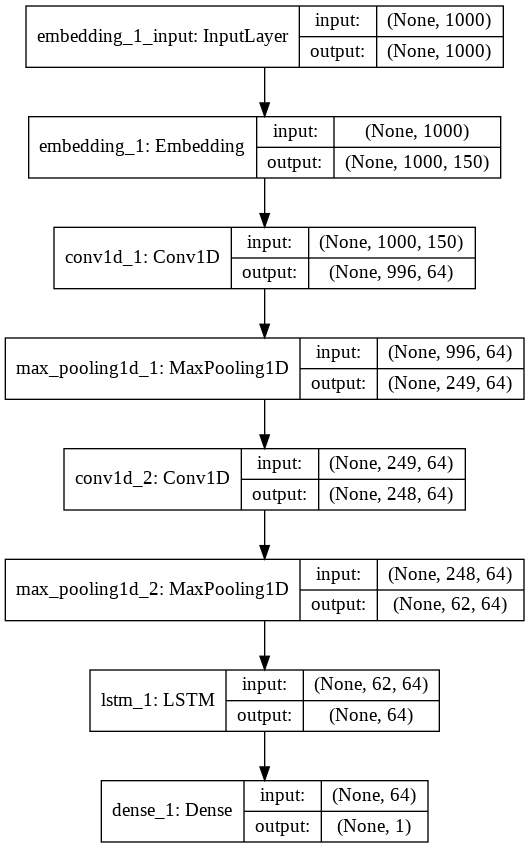

In [15]:
from keras.utils import plot_model
plot_model(model1, show_shapes=True, to_file='sent_analysis_model1.png')

#Model 1 Fitting and Prediction

In [16]:
m1=model1.fit(x_train,y_train,batch_size=35,epochs=5,verbose=1,validation_data = (x_test, y_test))




Train on 6329 samples, validate on 2117 samples
Epoch 1/5





6329/6329 [==============================] - 69s 11ms/step - loss: 0.3744 - acc: 0.8072 - val_loss: nan - val_acc: 0.9471
Epoch 2/5
6329/6329 [==============================] - 68s 11ms/step - loss: 0.1229 - acc: 0.9558 - val_loss: nan - val_acc: 0.9334
Epoch 3/5
6329/6329 [==============================] - 68s 11ms/step - loss: 0.0866 - acc: 0.9714 - val_loss: nan - val_acc: 0.9249
Epoch 4/5
6329/6329 [==============================] - 68s 11ms/step - loss: 0.0633 - acc: 0.9796 - val_loss: nan - val_acc: 0.9244
Epoch 5/5
6329/6329 [==============================] - 68s 11ms/step - loss: 0.0468 - acc: 0.9863 - val_loss: nan - val_acc: 0.9353


In [17]:
loss1,acc1=model1.evaluate(x_test, y_test)
#output: [loss, accuracy]

2117/2117 [==============================] - 5s 2ms/step


In [18]:
print(acc1)

0.9352857817666509


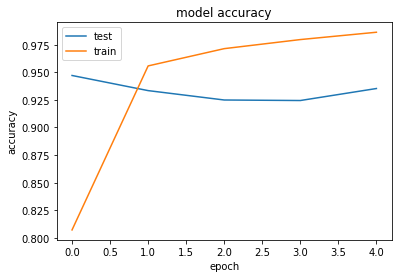

In [20]:
plt.plot(m1.history['val_acc'])
plt.plot(m1.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test', 'train'], loc='upper left')
plt.show()

#Creation of Model 2

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding
import re

In [22]:
embed_dim = 150
lstm_out = 500
model2 = Sequential()
model2.add(Embedding(max_fatures, embed_dim,input_length = x_train.shape[1], dropout=0.1))
model2.add(LSTM(64,  return_sequences = True))
model2.add(LSTM(64,  return_sequences = False))

#model2.add(LSTM(50, dropout_U=0.2,dropout_W=0.2, return_sequences = False))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model2.summary())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  after removing the cwd from sys.path.


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1000, 150)         150000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 1000, 64)          55040     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 238,129
Trainable params: 238,129
Non-trainable params: 0
_________________________________________________________________
None


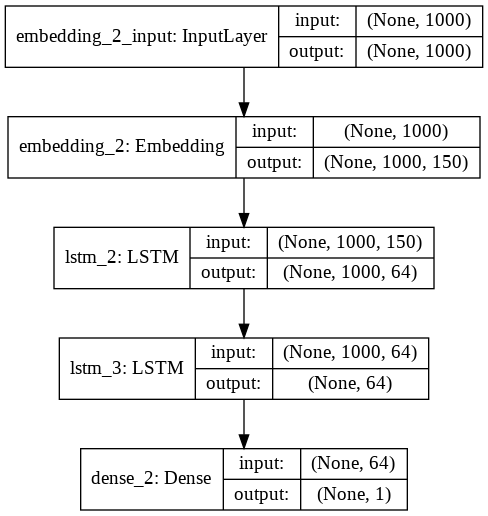

In [23]:
from keras.utils import plot_model
plot_model(model2, show_shapes=True, to_file='sent_analysis_model2.png')

#Model 2 Fitting and Prediction

In [24]:
m2=model2.fit(x_train,y_train,batch_size=35,epochs=5,verbose=1,validation_data = (x_test, y_test))

Train on 6329 samples, validate on 2117 samples
Epoch 1/5
6329/6329 [==============================] - 349s 55ms/step - loss: 0.3641 - acc: 0.8246 - val_loss: nan - val_acc: 0.9376
Epoch 2/5
6329/6329 [==============================] - 346s 55ms/step - loss: 0.1479 - acc: 0.9469 - val_loss: nan - val_acc: 0.9532
Epoch 3/5
6329/6329 [==============================] - 345s 55ms/step - loss: 0.1234 - acc: 0.9575 - val_loss: nan - val_acc: 0.9443
Epoch 4/5
6329/6329 [==============================] - 354s 56ms/step - loss: 0.1000 - acc: 0.9649 - val_loss: nan - val_acc: 0.9485
Epoch 5/5
6329/6329 [==============================] - 347s 55ms/step - loss: 0.0899 - acc: 0.9700 - val_loss: nan - val_acc: 0.9343


In [25]:
loss2,acc2=model2.evaluate(x_test, y_test)
#output: [loss, accuracy]

2117/2117 [==============================] - 20s 9ms/step


In [26]:
print(acc2)

0.9343410486819106


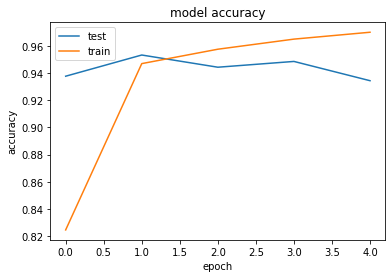

In [27]:
plt.plot(m2.history['val_acc'])
plt.plot(m2.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test', 'train'], loc='upper left')
plt.show()

#Comparing Models

<BarContainer object of 2 artists>

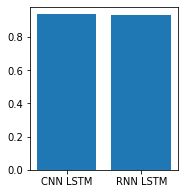

In [36]:
models = ['CNN LSTM', 'RNN LSTM']
values = [acc1,acc2]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(models, values)

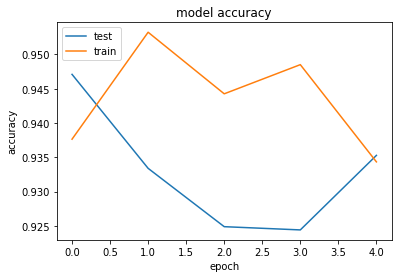

In [37]:
plt.plot(m1.history['val_acc'])
plt.plot(m2.history['val_acc'])
plt.title('Train Data Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['CNN-LSTM', 'RNN-LSTM'], loc='upper left')
plt.show()

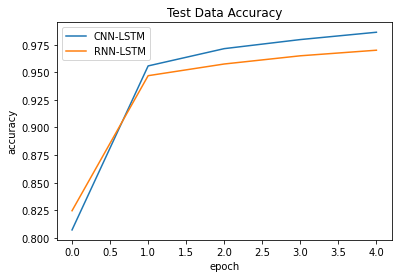

In [38]:
plt.plot(m1.history['acc'])
plt.plot(m2.history['acc'])
plt.title('Test Data Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['CNN-LSTM', 'RNN-LSTM'], loc='upper left')
plt.show()

#Pickling Data

In [0]:
from sklearn.externals import joblib    
from google.colab import files
joblib.dump(m1, 'dl1.pkl')
files.download('dl1.pkl')

In [0]:
from sklearn.externals import joblib    
from google.colab import files
joblib.dump(m2, 'dl2.pkl')
files.download('dl2.pkl')